In [48]:
## Import important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Importing Warnings to ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [50]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [53]:
df=pd.read_excel('Customer personality Analysis.xlsx')

In [54]:
df.shape 

(2240, 29)

In [55]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   float64       
 1   Year_Birth           2240 non-null   float64       
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   float64       
 6   Teenhome             2240 non-null   float64       
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   float64       
 9   MntWines             2240 non-null   float64       
 10  MntFruits            2240 non-null   float64       
 11  MntMeatProducts      2240 non-null   float64       
 12  MntFishProducts      2240 non-null   float64       
 13  MntSweetProducts     2240 non-nul

In [57]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [58]:
df.duplicated().sum()

0

In [59]:
df.rename(columns = {'MntGoldProds':'MntGoldProducts'}, inplace = True)

In [62]:
# converting columns to DateTime format
df['Year_Birth'] = pd.to_datetime(df['Year_Birth'], format ='%Y')
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [63]:
# Check the skewness before imputation of numeric cols
df['Income'].skew()

6.763487372811116

In [64]:
# Replacing null values with median cause the data is skewed which means there are outliers in the data
df['Income'].fillna(df['Income'].median(), inplace = True)

In [65]:
# check the unique values
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [66]:
# check the unique values
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [67]:
# findout the first and last date in dataset
df["Dt_Customer"].dt.year.min() , df["Dt_Customer"].dt.year.max()

(2012, 2014)

In [68]:
# Creating Age and Years_Customer ( Amount of years a personn has been customer) columns.
df['Age'] = (df["Dt_Customer"].dt.year.max()) - (df['Year_Birth'].dt.year)
df['Years_Customer'] = (df["Dt_Customer"].dt.year.max()) - (df['Dt_Customer'].dt.year)
df['Days_Customer'] = (df["Dt_Customer"].max()) - (df['Dt_Customer'])

# Total amount spent on products
df['TotalMntSpent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProducts']

# Total number of purchases made
df['TotalNumPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

# Total number of accepted campaigns
df['Total_Acc_Cmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']

# adding columns about the day, month and year cutomer joined
df['Year_Joined'] = df['Dt_Customer'].dt.year
df['Month_Joined'] = df['Dt_Customer'].dt.strftime("%B")
df['Day_Joined'] = df['Dt_Customer'].dt.day_name()

# dividing age into groups
df['Age_Group'] = pd.cut(x = df['Age'], bins = [17, 24, 44, 64, 150],
                         labels = ['Young adult','Adult','Middel Aged','Senior Citizen'])
# Total children living in the household
df["Children"] = df["Kidhome"] +  df["Teenhome"]

#Deriving living situation by marital status
df["Partner"]=df["Marital_Status"].replace({"Married":"Yes", "Together":"Yes", "Absurd":"No", "Widow":"No", "YOLO":"No", "Divorced":"No", "Single":"No","Alone":"No"})

#Segmenting education levels in three groups
df["Education_Level"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

In [69]:
# Dropping useless columns
df.drop(['ID','Z_CostContact','Z_Revenue','Year_Birth','Dt_Customer'], axis=1, inplace=True)

In [70]:
# Converting Days_Joined to int format
df['Days_Customer'] = df['Days_Customer'].dt.days.astype('int16')

In [71]:
print(df.shape)
df.sample(5)

(2240, 37)


,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,TotalMntSpent,TotalNumPurchases,Total_Acc_Cmp,Year_Joined,Month_Joined,Day_Joined,Age_Group,Children,Partner,Education_Level
380,PhD,Married,33581.0,2.0,0.0,38.0,11.0,0.0,5.0,0.0,...,17.0,4.0,0.0,2013,January,Tuesday,Middel Aged,2.0,Yes,Postgraduate
1518,Master,Married,37787.0,1.0,0.0,50.0,40.0,1.0,40.0,4.0,...,106.0,7.0,0.0,2013,September,Friday,Adult,1.0,Yes,Postgraduate
83,Master,Together,38620.0,0.0,0.0,56.0,112.0,17.0,44.0,34.0,...,318.0,11.0,0.0,2013,May,Saturday,Middel Aged,0.0,Yes,Postgraduate
2067,PhD,Married,77610.0,0.0,1.0,70.0,1245.0,33.0,332.0,21.0,...,1680.0,17.0,0.0,2012,October,Monday,Middel Aged,1.0,Yes,Postgraduate
1741,Graduation,Together,37292.0,1.0,0.0,32.0,275.0,0.0,86.0,10.0,...,460.0,19.0,0.0,2013,April,Thursday,Adult,1.0,Yes,Graduate


In [72]:
df1 = df.copy() # make a copy
df1.drop(['Education','Marital_Status','Years_Customer','Year_Joined','Month_Joined','Day_Joined'], axis=1, inplace=True)

In [73]:
num_col = df1.select_dtypes(include = np.number).columns

In [74]:
for col in num_col:
    q1 = df1[col].quantile(0.25)
    q3 = df1[col].quantile(0.75)
    iqr = q3-q1
    ll = q1-(1.5*iqr)
    ul = q3+(1.5*iqr)
    for ind in df1[col].index:
        if df1.loc[ind,col]>ul:
            df1.loc[ind,col]=ul
        elif df1.loc[ind,col]<ll:
            df1.loc[ind,col]=ll
        else:
            pass
print("Outliers have been taken care of")

Outliers have been taken care of


In [75]:
# selecting the cols to use
subset = df1[['Income','Kidhome','Teenhome','Age','Partner','Education_Level']]
print('This is the data we will use for clustering:')
subset.head()

This is the data we will use for clustering:


,Income,Kidhome,Teenhome,Age,Partner,Education_Level
0,58138.0,0.0,0.0,57,No,Graduate
1,46344.0,1.0,1.0,60,No,Graduate
2,71613.0,0.0,0.0,49,Yes,Graduate
3,26646.0,1.0,0.0,30,Yes,Graduate
4,58293.0,1.0,0.0,33,Yes,Postgraduate


In [76]:
# examin the min, max and mean of your columns
subset.describe()

,Income,Kidhome,Teenhome,Age
count,2240.000000,2240.000000,2240.000000,2240.000000
mean,51865.874554,0.444196,0.506250,45.147768
std,20936.104821,0.538398,0.544538,11.771725
min,1730.000000,0.000000,0.000000,18.000000
25%,35538.750000,0.000000,0.000000,37.000000
50%,51381.500000,0.000000,0.000000,44.000000
75%,68289.750000,1.000000,1.000000,55.000000
max,117416.250000,2.000000,2.000000,82.000000


In [77]:
# Importing essential libraries for bulding pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

In [78]:
# We are not scaling the kidhome, teenhome cols, cause thire min, max lies between 0 & 2
num_cols = ['Income','Age']
numeric_pipeline = make_pipeline(StandardScaler())

In [79]:
ord_cols = ['Education_Level']
ordinal_pipeline = make_pipeline(OrdinalEncoder(categories=[['Undergraduate','Graduate','Postgraduate']]))

In [80]:
nom_cols = ['Partner']
nominal_pipeline = make_pipeline(OneHotEncoder())

In [81]:
# stack your pipelines in column transformer
transformer = ColumnTransformer(transformers=[('num',numeric_pipeline,num_cols),
                                           ('ordinal', ordinal_pipeline,ord_cols),
                                              ('nominal' ,nominal_pipeline,nom_cols)
                                             ])

In [82]:
transformer

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['Income', 'Age']),
                                ('ordinal',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Undergraduate',
                                                                              'Graduate',
                                                                              'Postgraduate']]))]),
                                 ['Education_Level']),
                                ('nominal',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['Partner'])])

In [83]:
# Now lets fit and transform the data
transformed = transformer.fit_transform(subset)
print('Data has been Transformed')

Data has been Transformed


In [86]:
!pip install yellowbrick

Defaulting to user installation because normal site-packages is not writeable


In [87]:
from yellowbrick.cluster import KElbowVisualizer

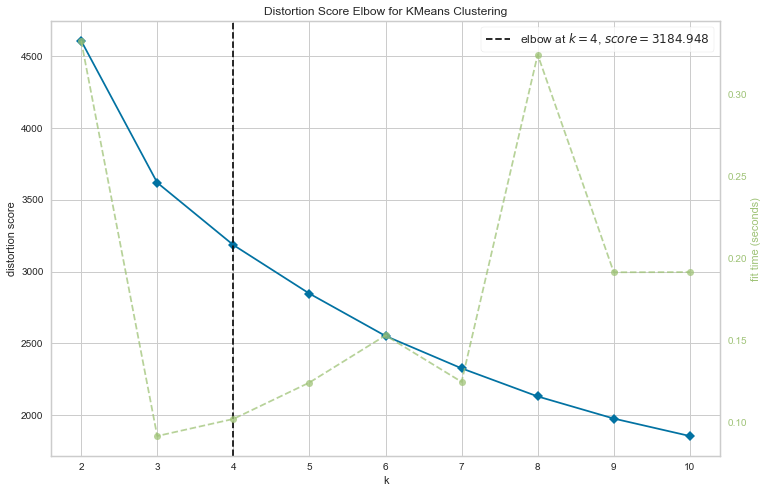

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [88]:
plt.figure(figsize=(12, 8))
elbow_graph = KElbowVisualizer(KMeans(random_state=43), k=10)
elbow_graph.fit(transformed)
elbow_graph.show()


In [89]:
# using k-means to form clusters
kmeans = KMeans(n_clusters=4, random_state=42)
subset['Clusters'] = kmeans.fit_predict(transformed) #fit the data and adding back clusters to the data in clusters column

In [90]:
subset.head()

,Income,Kidhome,Teenhome,Age,Partner,Education_Level,Clusters
0,58138.0,0.0,0.0,57,No,Graduate,2
1,46344.0,1.0,1.0,60,No,Graduate,2
2,71613.0,0.0,0.0,49,Yes,Graduate,1
3,26646.0,1.0,0.0,30,Yes,Graduate,0
4,58293.0,1.0,0.0,33,Yes,Postgraduate,1


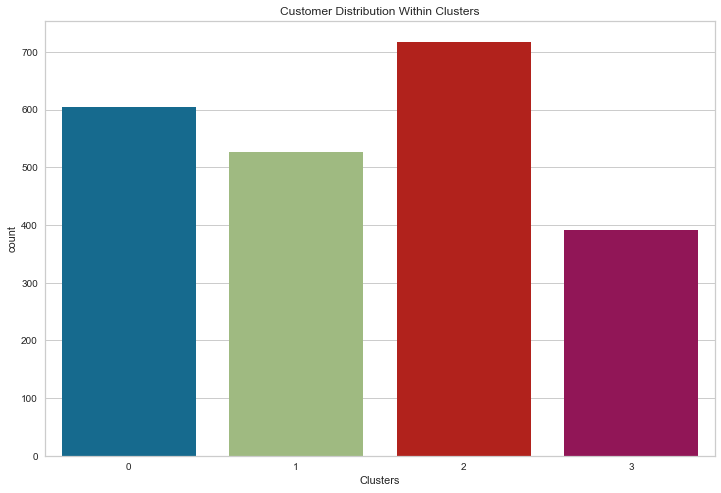

In [94]:

# count plot to see number of customers in each cluster
plt.figure(figsize=(12, 8))
sns.countplot(x='Clusters', data=subset)
plt.title('Customer Distribution Within Clusters')
plt.show()

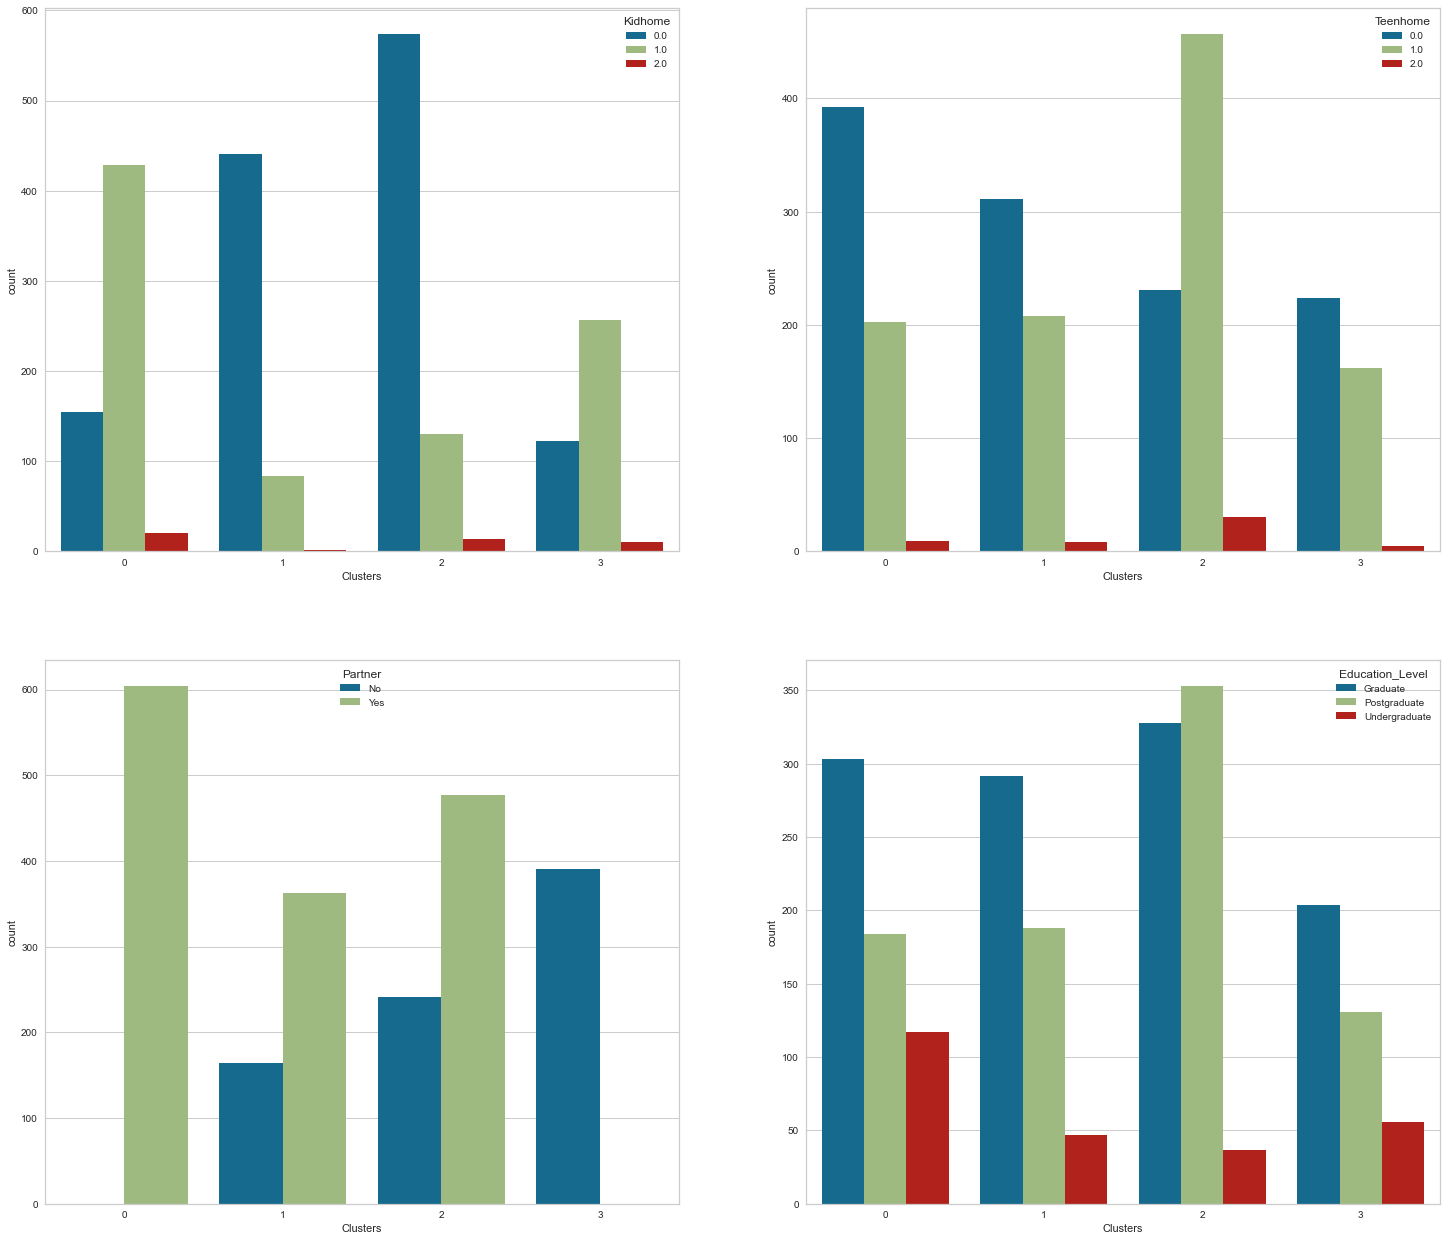

In [95]:
# create list of categories
count_cols= ['Kidhome','Teenhome','Partner','Education_Level']

_, ax1 = plt.subplots(2,2, figsize=(25,22))

for i, col in enumerate(count_cols):
    sns.countplot(x='Clusters', data=subset, ax=ax1[i//2, i%2],hue=col)
    
plt.show()

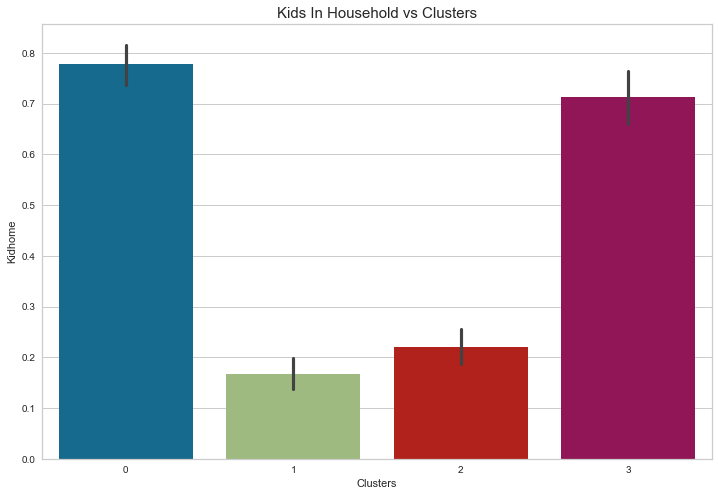

In [99]:
# Find out the customers which have kids in different clusters
plt.figure(figsize=(12, 8))
sns.barplot(x=subset["Clusters"], y=subset["Kidhome"])
plt.title("Kids In Household vs Clusters", size=15)
plt.show()


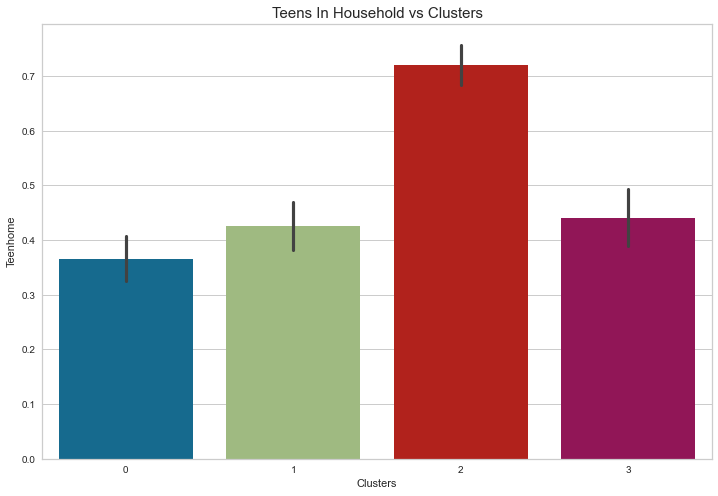

In [98]:
# Find out the customers which have kids in different clusters
plt.figure(figsize=(12, 8))
sns.barplot(x=subset["Clusters"], y=subset["Teenhome"])
plt.title("Teens In Household vs Clusters", size=15)
plt.show()

In [100]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [101]:
# separate features and target column
x = subset.drop('Clusters', axis=1)
y = subset['Clusters']

In [102]:
# create train and test data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [103]:
# adding GradientBoostingClassifier to transformer pipeline
final_pipeline = make_pipeline(transformer, GradientBoostingClassifier())

In [104]:
# fit the data to new pipeline & model
final_pipeline.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Income', 'Age']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Undergraduate',
                                                                                               'Graduate',
                                                                                               'Postgraduate']]))]),
                                                  ['Education_Level']),
                                                 ('nominal',
                                               

In [105]:
# check the accuracy of our model
final_pipeline.score(x_test, y_test)


0.9702380952380952

In [106]:
import pickle

In [107]:
filename = 'classifier.pkl' # create a variable with name you wanna give to the file
pickle.dump(final_pipeline, open(filename,'wb')) 

In [110]:
# Install streamlit 
# NB : If any error occurs during installation process , run it again
!pip install -q streamlit